In [1]:
# Dependencies
import matplotlib.pyplot as plt
from citipy import citipy as cp
import pandas as pd
import requests as req
import json
import time

In [2]:
#from citipy, retrieve list of cities based on lat and long 
list_of_cities = []
counter = 0
Duplicates  = 'no'
starting_lat = -90
starting_lng = -180
while counter <= 600:
    for x in range(-90,90,2):
        for y in range(-180,180,7):
            if counter > 600: continue   
            city = cp.nearest_city(x, y)
            citdict = {}
            citdict['city'] = city.city_name
            citdict['country'] = city.country_code
            citdict['lat'] = x
            citdict['long'] = y
            if len(list_of_cities) == 0:
                list_of_cities.append(citdict)
                counter+=1
                continue
            else:
            #Get rid of duplicates
                for city in list_of_cities:
                    if city['city'] == citdict['city']:
                        Duplicates = 'yes'
            if Duplicates == 'no':
                list_of_cities.append(citdict)
                counter+=1
            else:
                Duplicates = 'no'

print(len(list_of_cities))  

601


In [3]:
print(list_of_cities[0])

{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [4]:
#Creating dataframe of 900 cities
cities_df = pd.DataFrame({
    'city': [x['city'] for x in list_of_cities],
    'country': [x['country'] for x in list_of_cities],
})

In [5]:
cities_sample = cities_df.sample(600)
cities_sample

,city,country
489,yirol,sd
63,ulladulla,au
575,dong xoai,vn
290,milingimbi,au
253,jaciara,br
402,manta,ec
559,oistins,bb
491,eyl,so
526,siocon,ph
456,limbe,cm


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = '7806ba238e6261a7592a464fdca9176b'

In [7]:
units = "Imperial"
count = 0
cities_sample['latitude'] = ""
cities_sample['longitude'] = ""
cities_sample['temperature'] = ""
cities_sample['humidity'] = ""
cities_sample['cloudiness'] = ""
cities_sample['wind_speed'] = ""

for index,row in cities_sample.iterrows():
    count+= 1
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#setting the values extracted for url
        cities_sample.set_value(index, "latitude", int(cityweather['coord']['lat']))
        cities_sample.set_value(index, "longitude", int(cityweather['coord']['lat']))
        cities_sample.set_value(index, "temperature", int(cityweather['main']['temp']))
        cities_sample.set_value(index, "humidity", int(cityweather['main']['humidity']))
        cities_sample.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        cities_sample.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")

No data for this city: yirol
This is city#: 1
This is: yirol
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=yirol
This is city#: 2
This is: ulladulla
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ulladulla
This is city#: 3
This is: dong xoai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=dong xoai
No data for this city: milingimbi
This is city#: 4
This is: milingimbi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=milingimbi
This is city#: 5
This is: jaciara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=jaciara
This is city#: 6
This is: manta
This is the requested URL: http://a

This is city#: 48
This is: kloulklubed
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=kloulklubed
This is city#: 49
This is: ternate
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ternate
No data for this city: acapulco
This is city#: 50
This is: acapulco
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=acapulco
This is city#: 51
This is: liwale
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=liwale
This is city#: 52
This is: ixtapa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ixtapa
This is city#: 53
This is: northam
This is the requested URL: http://api.openweathermap.org/data/

This is city#: 94
This is: lagunas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=lagunas
This is city#: 95
This is: moussoro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=moussoro
This is city#: 96
This is: sibolga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=sibolga
This is city#: 97
This is: new norfolk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=new norfolk
This is city#: 98
This is: manacapuru
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=manacapuru
No data for this city: kaitangata
This is city#: 99
This is: kaitangata
This is the requested URL: http://api.openweath

This is city#: 139
This is: grand-santi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=grand-santi
This is city#: 140
This is: te anau
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=te anau
This is city#: 141
This is: djougou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=djougou
This is city#: 142
This is: diapaga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=diapaga
No data for this city: andevoranto
This is city#: 143
This is: andevoranto
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=andevoranto
This is city#: 144
This is: port-gentil
This is the requested URL: http://api.o

This is city#: 185
This is: shambu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=shambu
This is city#: 186
This is: kigali
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=kigali
This is city#: 187
This is: boca do acre
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=boca do acre
No data for this city: lolua
This is city#: 188
This is: lolua
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=lolua
This is city#: 189
This is: kayes
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=kayes
This is city#: 190
This is: anloga
This is the requested URL: http://api.openweathermap.org/data/2.5/we

This is city#: 231
This is: bahir dar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=bahir dar
This is city#: 232
This is: santo augusto
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=santo augusto
This is city#: 233
This is: serabu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=serabu
No data for this city: grand river south east
This is city#: 234
This is: grand river south east
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=grand river south east
No data for this city: soyo
This is city#: 235
This is: soyo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=soyo
This is city#: 236

This is city#: 277
This is: lebu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=lebu
No data for this city: tsabong
This is city#: 278
This is: tsabong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=tsabong
No data for this city: taua
This is city#: 279
This is: taua
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=taua
This is city#: 280
This is: coahuayana
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=coahuayana
This is city#: 281
This is: asau
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=asau
This is city#: 282
This is: mahajanga
This is the requested URL: http://api.openwea

This is city#: 336
This is: san jeronimo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=san jeronimo
This is city#: 337
This is: bengkulu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=bengkulu
This is city#: 338
This is: trelew
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=trelew
This is city#: 339
This is: camabatela
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=camabatela
No data for this city: moindou
This is city#: 340
This is: moindou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=moindou
This is city#: 341
This is: puerto ayora
This is the requested URL: http://api.open

This is city#: 381
This is: jitauna
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=jitauna
No data for this city: jimma
This is city#: 382
This is: jimma
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=jimma
This is city#: 383
This is: port macquarie
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=port macquarie
This is city#: 384
This is: hargeysa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=hargeysa
This is city#: 385
This is: sarangani
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=sarangani
This is city#: 386
This is: jamestown
This is the requested URL: http://api.openweath

This is city#: 427
This is: barcelos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=barcelos
This is city#: 428
This is: batticaloa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=batticaloa
This is city#: 429
This is: ambon
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ambon
This is city#: 430
This is: kiunga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=kiunga
No data for this city: sataua
This is city#: 431
This is: sataua
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=sataua
This is city#: 432
This is: avarua
This is the requested URL: http://api.openweathermap.org/data/2.5

This is city#: 473
This is: buchanan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=buchanan
This is city#: 474
This is: rafaela
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=rafaela
No data for this city: eucaliptus
This is city#: 475
This is: eucaliptus
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=eucaliptus
This is city#: 476
This is: marienburg
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=marienburg
This is city#: 477
This is: faanui
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=faanui
This is city#: 478
This is: boueni
This is the requested URL: http://api.openweather

This is city#: 519
This is: guerrero negro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=guerrero negro
This is city#: 520
This is: vazante
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=vazante
This is city#: 521
This is: rajampet
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=rajampet
This is city#: 522
This is: bunia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=bunia
This is city#: 523
This is: tres arroyos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=tres arroyos
This is city#: 524
This is: souillac
This is the requested URL: http://api.openweathermap.org/data/2.5/weath

This is city#: 565
This is: hokitika
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=hokitika
This is city#: 566
This is: coroico
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=coroico
This is city#: 567
This is: port elizabeth
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=port elizabeth
This is city#: 568
This is: ancud
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ancud
This is city#: 569
This is: tairua
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=tairua
This is city#: 570
This is: cabo san lucas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?app

In [8]:
cities_sample = cities_sample[cities_sample.latitude != ""]

In [9]:
# to test the accuracy of sampled cities distribution 
#plt.scatter(cities_sample['latitude'],cities_sample['longitude'])
#plt.title(f"Sample Distribution ")
#plt.xlabel("Latitude")
#plt.ylabel("Longitude")
#plt.show()

In [10]:
#using today's date
date = time.strftime("%m/%d/%Y")
# ploting Temp and lat
plt.scatter(cities_sample['latitude'],cities_sample['temperature'])
plt.title(f" City Latitude Vs. Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")

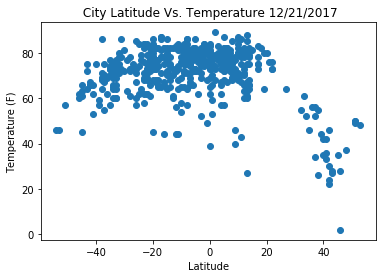

In [11]:
plt.show()

In [12]:
# plting lat and humidity
plt.scatter(cities_sample['latitude'], cities_sample['humidity'])
plt.title(f"City Latitude Vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")

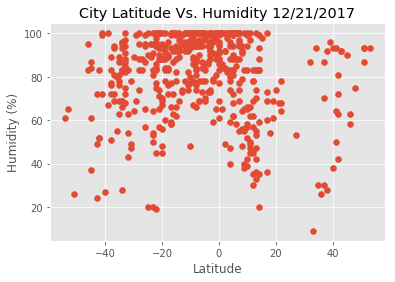

In [13]:
plt.show()

In [14]:
# plting lat and cloudiness 
plt.scatter(cities_sample['latitude'], cities_sample['cloudiness'])
plt.title(f"City Latitude Vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")

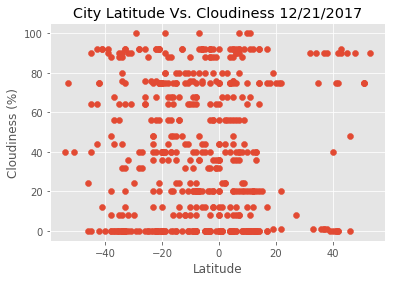

In [15]:
plt.show()

In [16]:
# plting lat and windspeed
plt.scatter(cities_sample['latitude'], cities_sample['wind_speed'])
plt.title(f"City Latitude Vs. Wend Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")

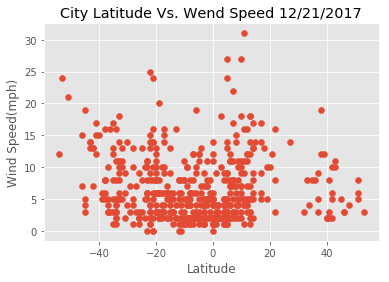

In [17]:
plt.show()

In [18]:
#save Analysis into CSV file:
cities_sample.to_csv("CitiesSample.csv", encoding="utf-8", index=False)
df = pd.read_csv("CitiesSample.csv")